In [1]:
%ds_look
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# imports
import matplotlib.pyplot as plt, numpy as np, pandas as pd
from sklearn.cluster import KMeans


/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


This tutorial is a beginner introduction to the k-means clustering algorithm, and shows an example in Python of how the algorithm can be used on your dataset to find naturally-occurring groups.  Knowledge of machine learning is not required, but the reader should be familiar with basic data analysis (e.g., descriptive analysis).


# Introduction to $K$-means clustering

$K$-means clustering is a type of unsupervised learning, which is used when you have unlabeled data (i.e., data without defined categories or groups).  The goal of this algorithm is to find groups in the data, with the number of groups represented by the variable $K$.  The algorithm works iteratively to assign each data point to one of $K$ groups based on the features that are provided.  Data points are clustered based on feature similarity.  The results of the $K$-means clustering algorithm are:

1) the centroids of the $K$ clusters, which can be used to label new data 

2) labels for the training data (each data point is assigned to a single cluster)

Rather than defining groups before looking at the data, clustering allows one to find and analyze the groups that have formed organically.  Each centroid of a cluster is a collection of feature values which define the resulting groups.  Examining the centroid feature weights can be used to qualitatively interpret what kind of group each cluster represents.  The Algorithm: Choosing $K$ section below describes how the number of groups can be determined.  Each group can be treated as a category or label.  The results are labels for the training data and the ability to label new data by assigning each data point to its closest centroid.


# Example: Delivery fleet data

As an example, we'll show how the $K$-means algorithm works with a sample dataset of delivery fleet driver data.  For the sake of simplicity, we'll only be looking at two driver features: mean distance driven per day and the mean percentage of time a driver was $>5$ mph over the speed limit.  In general, this algorithm can be used for any number of features, so long as the number of data samples is much greater than the number of features.

A sample of the data as a `pandas DataFrame` is shown below. 

In [2]:
plt.rcParams['figure.figsize'] = (12, 6)
 
N=4000

distmean, distsig = 50, 10 # mean and standard deviation
f1 = np.random.normal(distmean, distsig, N*.8)
distmean, distsig = 180, 20 # mean and standard deviation
f1 = np.append(f1,np.random.normal(distmean, distsig, N*.2))

speedmean, speedsig = 30, 10 # mean and standard deviation
f2 = np.random.normal(speedmean, speedsig, N*.8*.15)
speedmean, speedsig = 5, 2 # mean and standard deviation
f2 = np.append(f2,np.random.normal(speedmean, speedsig, N*.8*.85))
speedmean, speedsig = 65, 20 # mean and standard deviation
f2 = np.append(f2,np.random.normal(speedmean, speedsig, N*.2*.15))
speedmean, speedsig = 10, 5 # mean and standard deviation
f2 = np.append(f2,np.random.normal(speedmean, speedsig, N*.2*.85))

# make valid probabilities
f2[f2>100]=99
f2[f2<0]=1


In [3]:
import random

hash_num = random.getrandbits(32)
id_num = np.arange(0,4000)+hash_num
id_num = np.random.permutation(id_num)

d = {'Driver_ID': id_num,'Distance_Feature': np.round(f1,decimals=2), 'Speeding_Feature': np.round(f2)}
df = pd.DataFrame(d, index=np.arange(0,len(f1)),columns=['Driver_ID','Distance_Feature','Speeding_Feature'])
df.head()

,Driver_ID,Distance_Feature,Speeding_Feature
0,1899752640,43.20,28
1,1899751817,43.68,29
2,1899753719,46.53,19
3,1899752793,51.33,20
4,1899752176,54.73,15


The chart below shows the dataset for 4000 drivers, with the distance feature on the x-axis and speeding feature on the y-axis.  

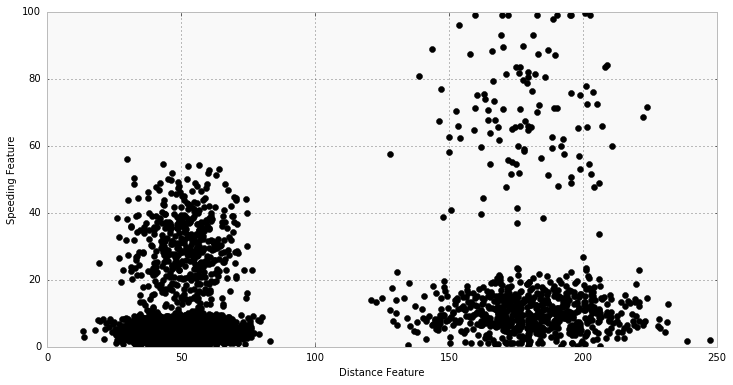

In [4]:
plt.figure()
plt.plot(f1,f2,'ko')
plt.ylabel('Speeding Feature')
plt.xlabel('Distance Feature')
plt.show()

We first run the algorithm with K=2, which is the minimum number of clusters that can exist in a dataset.  In this example, we use the Python packages scikit-learn and numpy for computations.

```
import numpy as np
from sklearn.cluster import KMeans

### For the purposes of this example, we store feature data from our dataframe `df`, in the `f1` and `f2` arrays. We combine this into a feature matrix `X` before entering it into the algorithm.
f1 = df['Speeding Feature'].values()
f2 = df['Distance Feature'].values()

X=np.matrix(zip(f1,f2))
kmeans = KMeans(n_clusters=2).fit(X)

```

The cluster labels are returned in `kmeans.labels_`. 

The chart below shows the results.  Visually, you can see that the K-means algorithm splits the two groups based on the distance feature.  Each cluster centroid is marked with a star.

* Group 1 Centroid = (49.62, 8.72) 
* Group 2 Centroid = (179.73, 17.95)

Using domain knowledge of the dataset, we can infer that Group 1 is urban drivers and Group 2 is rural drivers.

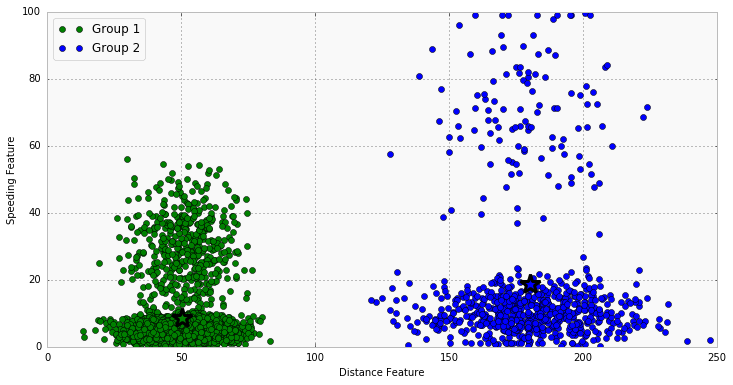

In [5]:
# add centroids
kmeans = KMeans(n_clusters=2).fit(np.matrix(zip(f1,f2)))

plt.figure()
h1,=plt.plot(f1[kmeans.labels_==0],f2[kmeans.labels_==0],'go')
plt.plot(np.mean(f1[kmeans.labels_==0]),np.mean(f2[kmeans.labels_==0]),'g*',markersize=20,mew=3)
#print(np.mean(f1[kmeans.labels_==0]),np.mean(f2[kmeans.labels_==0]))
h2,=plt.plot(f1[kmeans.labels_==1],f2[kmeans.labels_==1],'bo')
plt.plot(np.mean(f1[kmeans.labels_==1]),np.mean(f2[kmeans.labels_==1]),'b*',markersize=20,mew=3)
#print(np.mean(f1[kmeans.labels_==1]),np.mean(f2[kmeans.labels_==1]))
plt.ylabel('Speeding Feature')
plt.xlabel('Distance Feature')

plt.legend([h1,h2],['Group 1','Group 2'], loc='upper left')
plt.show()

We now want to test how the results look for K=4.  To do this, all that we need to change is the target number of clusters in the `KMeans()` function.

```
kmeans = KMeans(n_clusters=4).fit(X)
```

The chart below shows the resulting clusters.  We see that four distinct groups have been identified by the algorithm, now speeding drivers have been separated from those who follow speed limits along with the rural vs. urban divide.  The threshold for speeding is lower with the urban driver group than for the rural drivers, likely due to urban drivers spending more time in intersections and stop-and-go traffic.

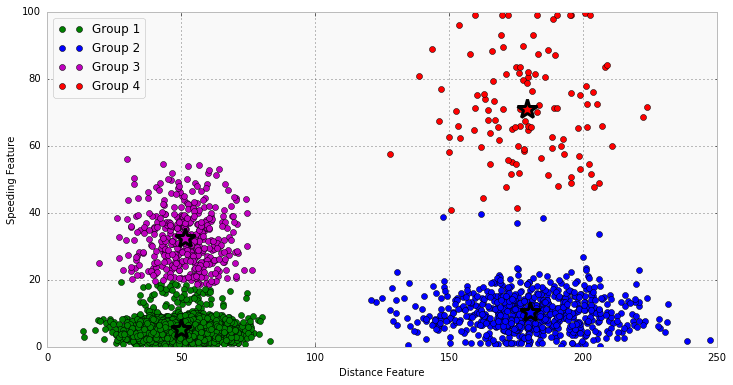

In [6]:
kmeans = KMeans(n_clusters=4).fit(np.matrix(zip(f1,f2)))

plt.figure()
h1,=plt.plot(f1[kmeans.labels_==0],f2[kmeans.labels_==0],'go')
plt.plot(np.mean(f1[kmeans.labels_==0]),np.mean(f2[kmeans.labels_==0]),'g*',markersize=20,mew=3)
h2,=plt.plot(f1[kmeans.labels_==1],f2[kmeans.labels_==1],'bo')
plt.plot(np.mean(f1[kmeans.labels_==1]),np.mean(f2[kmeans.labels_==1]),'b*',markersize=20,mew=3)
h3,=plt.plot(f1[kmeans.labels_==2],f2[kmeans.labels_==2],'mo')
plt.plot(np.mean(f1[kmeans.labels_==2]),np.mean(f2[kmeans.labels_==2]),'m*',markersize=20,mew=3)
h4,=plt.plot(f1[kmeans.labels_==3],f2[kmeans.labels_==3],'ro')
plt.plot(np.mean(f1[kmeans.labels_==3]),np.mean(f2[kmeans.labels_==3]),'r*',markersize=20,mew=3)
plt.ylabel('Speeding Feature')
plt.xlabel('Distance Feature')
plt.legend([h1,h2,h3,h4],['Group 1','Group 2','Group 3','Group 4'], loc='upper left')
plt.show()

The clusters allow one to draw insights from the data and take customized action for each group.  In this case, the company may want to add driver incentives and track if and how drivers shift from one group to another.

# Business Uses

The $K$-means clustering algorithm is used to find groups which have not been explicitly labeled in the data.  This can be used to confirm business assumptions about what types of groups exist or to identify unknown groups in complex data sets.  Once the algorithm has been run and the groups are defined, any new data can be easily assigned to the correct group.

This is a versatile algorithm that can be used for any type of grouping.  Some examples of use cases are:

* Behavioral segmentation
    * Segmentation by purchase history
    * Segmentation by activities on application, website, or platform
    * Personas based on interests
    * Profiles based on activity monitoring
* Inventory categorization
    * Group inventory by sales activity
    * Group inventory by manufacturing metrics
* Sorting sensor measurements
    * Detect activity types in motion sensors
    * Group images
    * Separate audio
    * Identify groups in health monitoring
* Detecting bots or anomalies
    * Separate valid activity groups from bots
    * Group valid activity to clean up outlier detection

In addition, monitoring if a tracked data point switches between groups over time can be used to detect meaningful changes in the data.  


# Algorithm

The $K$-means clustering algorithm uses iterative refinement to produce a final result.  The algorithm inputs are the number of clusters $K$ and the data set.  The data set is a collection of features for each data point.  The algorithms starts with initial estimates for the $K$ centroids, which can either be randomly generated or randomly selected from the data set.  The algorithm then iterates between two steps:

1) Data assigment step: 

Each centroid defines one of the clusters.  In this step, each data point is assigned to its nearest centroid, based on the squared Euclidean distance.  More formally, if $c_i$ is the collection of centroids in set $C$, then each data point $x$ is assigned to a cluster based on

$$\underset{c_i \in C}{\arg\min} \; dist(c_i,x)^2$$

where $dist(\cdot)$ is the standard ($L_2$) Euclidean distance.  Let the set of data point assignments for each $i^{th}$ cluster centroid be $S_i$.

2) Centroid update step:

In this step, the centroids are recomputed.  This is done by taking the mean of all data points assigned to that centroid's cluster.

$$c_i=\frac{1}{|S_i|}\sum_{x_i \in S_i} x_i$$

The algorithm iterates between step 1 and 2 until a stopping criteria is met (i.e. no data points change clusters, the sum of the distances is minimized, or some maximum number of iterations is reached).

This algorithm is guaranteed to converge to a result.  The result may be a local optimum (i.e., not necessarily the best possible outcome) meaning that assessing more than one run of the algorithm with randomized starting centroids may give a better outcome.

### Choosing $K$

The algorithm described above finds the clusters and data set labels for a particular pre-chosen $K$.  To find the number of clusters in the data, the user needs to run the $K$-means clustering algorithm for a range of $K$ values and compare the results.  In general, there is no method for determining exact value of $K$, but an accurate estimate can be obtained using the following techniques. 

One of the metrics that is commonly used to compare results across different values of $K$ is the mean distance between data points and their cluster centroid.  Since increasing the number of clusters will always reduce the distance to data points, increasing $K$ will *always* decrease this metric, to the extreme of reaching zero when $K$ is the same as the number of data points.  Thus, this metric cannot be used as the sole target.  Instead, mean distance to the centroid as a function of $K$ is plotted and the "elbow point", where the rate of decrease sharply shifts, can be used to roughly determine $K$. 

A number of other techniques exist for validating $K$, including cross-validation, information criteria, the information theoretic jump method, the silhouette method, and the G-means algorithm.  In addition, monitoring the distribution of data points across groups provides insight into how the algorithm is splitting the data for each $K$.

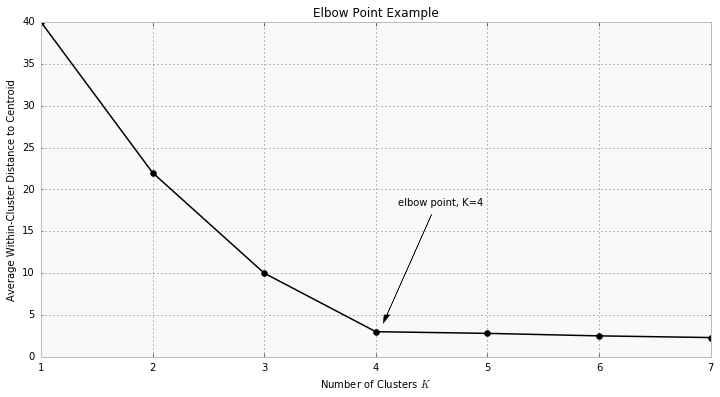

In [54]:
plt.figure()
x=np.asarray([40, 22, 10, 3, 2.8, 2.5, 2.3])
plt.plot(range(1,8),x,'k-o', linewidth=1.5)
plt.xlabel('Number of Clusters $K$')
plt.ylabel('Average Within-Cluster Distance to Centroid')
plt.title('Elbow Point Example')
plt.arrow(4.5, 17, -.4, -12, head_width=0.05, head_length=1, fc='k', ec='k')
plt.annotate('elbow point, K=4', xy=(2, 1), xytext=(4.2, 18))
plt.show()

# Additional Notes and Alternatives

### Feature Engineering

Feature engineering is the process of using domain knowledge to choose which data metrics to input as features into a machine learning algorithm.  Feature engineering plays a key role in $K$-means clustering; using meaningful features that capture the variability of the data is essential for the algorithm to find all of the naturally-occurring groups.  Categorical data (i.e., category labels such as gender, country, browser type) needs to be encoded or separated in a way that can still work with the algorithm.  Feature transformations, particularly to represent rates rather than measurements, can help to normalize the data.  For example, in the deliery fleet example above if total distance driven had been used rather than mean distance per day, then drivers would have been grouped by how long they had been driving for the company rather than rural vs. urban.  

### Alternatives

A number of alternative clustering algorithms exist including DBScan, spectral clustering, and modeling with Gaussian mixtures.  A dimensionality reduction technique, such as principal component analysis, can be used to separate groups of patterns in data.  

One possible outcome is that there are no organic clusters in the data, instead, all of the data fall along the continuous feature ranges within one single group.  In this case, one may need to revisit the data features to see if different measurements need to be included or a feature transformation would better represent the variability in the data.  In addition, one may want to impose categories or labels based on domain knowledge and modify their analysis approach.


# Additional Resources

http://scikit-learn.org/stable/modules/clustering.html#k-means

